# Summer 2021 -> INSY 5379 -> Capstone Project
### UTA MSBA students: 
- Phanikrishna Karanam
- Swetha Gollamudi
- Joel Andrews

#### Analysis on data extracted for Products & Solutions 

__Summary__: This notebook analyzes the data extracted using the generic web scraper for Products & Solutions of Health IT vendors

In [1]:
import pandas as pd
import numpy as np
import string
import nltk
import spacy
import warnings

warnings.filterwarnings('ignore')

nlp = spacy.load('en_core_web_lg')
stop_words = nltk.corpus.stopwords.words('english')

In [2]:
# set below options to review complete DataFrame in output cells
# Note: load time and processing will be higher  

#pd.set_option('max_rows', None)
#pd.set_option('max_columns', None)
#pd.set_option('max_colwidth', -1)

In [3]:
in_file = 'C:/MSBA/Summer 2021/INSY 5379 - Capstone Project/Task 1/HIT Output - Products & Solutions.csv'
out_file = 'C:/MSBA/Summer 2021/INSY 5379 - Capstone Project/Task 1/Output - HIT Cluster.csv'
model_inp_file = 'C:/MSBA/Summer 2021/INSY 5379 - Capstone Project/Task 1/Model Build - Input.csv'

header_out = ['Company Name', 'Cluster']

In [4]:
def pre_process(text):
    
    # Convert to lower case
    text = str(text).lower()

    # Remove delimiters and merge text
    text = ' '.join(text.split(' | '))
    
    # Remove Digits & Punctuation
    exclude_chars = string.digits + string.punctuation
    table = str.maketrans(exclude_chars, len(exclude_chars) * ' ')
    text = text.translate(table)
    
    # Remove Stop Words
    text = ' '.join([word for word in text.split() if word not in stop_words and len(word) > 2])
    
    # Lemmatize the Words
    text = ' '.join([token.lemma_ for token in nlp(text)])
    
    # Stem the Words
    #stemmer = nltk.PorterStemmer()
    #text = ' '.join([stemmer.stem(word) for word in text.split()])
     
    text = text.replace('PRON','').replace('-PRON-','')
    
    return (text)

In [5]:
df_inp = pd.read_csv(in_file)
df_inp.drop_duplicates(subset = ['Company Name'], inplace = True)

company_name = df_inp['Company Name'].values.tolist()
corpus = df_inp['Page_Text'].map(pre_process).values.tolist()
corpus_joined = ' '.join(corpus)

#corpus = df_inp['Page_Text'].map(lambda text: ' '.join(str(text).lower().split(' | '))).values.tolist()
#input_list = df_inp[['Company Name', 'Page_Text']].values.tolist()

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words = 'english', min_df = 20, ngram_range = (2,8))

dtm = vectorizer.fit_transform(corpus)
terms = vectorizer.get_feature_names()
word_freq = dtm.toarray().sum(axis=0)

df_dtm = pd.DataFrame(dtm.toarray(), columns = terms, index = company_name)
df_dtm

,acute care,artificial intelligence,behavioral health,business intelligence,care coordination,care management,consulting service,covid resource,customer success,cycle management,...,revenue cycle,revenue cycle management,risk management,service support,social responsibility,solution patient,success story,supply chain,use case,value base
MEDHOST,2,0,1,0,0,0,0,0,0,0,...,4,0,0,0,0,1,0,0,0,0
nThrive,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,1,0,0,0,0
TrialStat Solutions Inc.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Curve Dental,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VetSuccess,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Chetu, Inc.",0,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
TractManager,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Claimocity,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bridge Connector,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
freq_list = list(zip(terms, word_freq))
freq_dict = dict(freq_list)

df_freq = pd.DataFrame(freq_list, columns = ['Text', 'Freq'])
df_freq.sort_values(by = ['Freq'], ascending = False, inplace = True)
df_freq

,Text,Freq
41,revenue cycle,113
30,patient engagement,82
35,practice management,78
33,population health,67
9,cycle management,66
42,revenue cycle management,63
16,health plan,53
48,supply chain,50
32,patient portal,50
24,management software,49


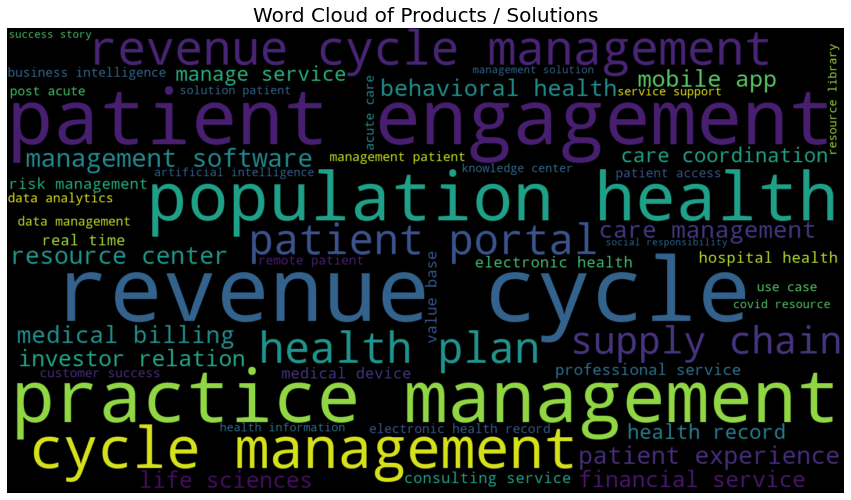

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 1440, height = 800, relative_scaling = 0.5, stopwords = stopwords) \
                     .generate_from_frequencies(freq_dict)

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Products / Solutions', fontsize = 20)
plt.show()

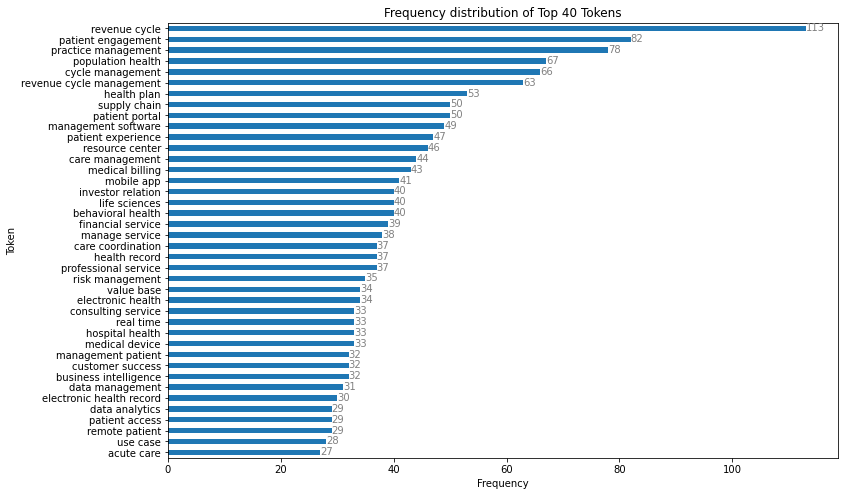

In [9]:
plot = df_freq.groupby('Text')['Freq'].sum() \
              .sort_values(ascending = False)[:40] \
              .sort_values(ascending = True) \
              .plot(kind='barh', figsize=(12,8))
 
# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), i.get_width(), color='grey')

plot.set_title('Frequency distribution of Top 40 Tokens')
plot.set_xlabel('Frequency') 
plot.set_ylabel('Token')
plt.show()

In [10]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 10, random_state = 337)
cluster_solution = km.fit(dtm)
cluster_membership = km.predict(dtm)
dist_to_cluster = km.transform(dtm)
 
cluster_dict = {'Company Name': company_name,
                'Cluster Num': cluster_membership, 
                'D_2_C_0': dist_to_cluster[:, 0], 
                'D_2_C_1': dist_to_cluster[:, 1], 
                'D_2_C_2': dist_to_cluster[:, 2],
                'D_2_C_3': dist_to_cluster[:, 3],
                'D_2_C_4': dist_to_cluster[:, 4],
                'D_2_C_5': dist_to_cluster[:, 5],
                'D_2_C_6': dist_to_cluster[:, 6],
                'D_2_C_7': dist_to_cluster[:, 7],
                'D_2_C_8': dist_to_cluster[:, 8],
                'D_2_C_9': dist_to_cluster[:, 9]
                #'D_2_C_10': dist_to_cluster[:, 10],
                #'D_2_C_11': dist_to_cluster[:, 11],
                #'D_2_C_12': dist_to_cluster[:, 12],
                #'D_2_C_13': dist_to_cluster[:, 13],
                #'D_2_C_14': dist_to_cluster[:, 14],
                #'D_2_C_15': dist_to_cluster[:, 15],
                #'D_2_C_16': dist_to_cluster[:, 16],
                #'D_2_C_17': dist_to_cluster[:, 17],
                #'D_2_C_18': dist_to_cluster[:, 18],
                #'D_2_C_19': dist_to_cluster[:, 19]
               }

df_clusters = pd.DataFrame(cluster_dict) 
cluster_num = df_clusters['Cluster Num'].values.tolist()

df_clusters['Cluster Num'].value_counts(sort = False)

0     25
1     23
2     10
3     38
4      6
5      3
6     25
7    501
8     34
9     32
Name: Cluster Num, dtype: int64

In [11]:
#df_clusters.sort_values(by = ['Cluster Num'], inplace = True)
#df_clusters.reset_index(drop = True, inplace = True)

df_clusters.to_csv(out_file, index = False)
df_clusters

,Company Name,Cluster Num,D_2_C_0,D_2_C_1,D_2_C_2,D_2_C_3,D_2_C_4,D_2_C_5,D_2_C_6,D_2_C_7,D_2_C_8,D_2_C_9
0,MEDHOST,3,5.433967,4.991486,5.615158,4.262508,7.278202,7.724420,5.543284,5.405651,5.636556,5.611529
1,nThrive,3,3.505424,3.647772,5.470832,2.821072,6.135054,6.377042,3.505424,3.267439,3.630775,3.612722
2,TrialStat Solutions Inc.,7,1.856879,2.216965,5.322593,2.375428,5.225472,5.446712,1.499333,0.177330,1.664560,1.597422
3,Curve Dental,1,2.899655,2.255847,5.092151,3.188883,4.355711,5.859465,2.624500,2.381631,2.819084,2.859503
4,VetSuccess,7,1.856879,2.216965,5.322593,2.375428,5.225472,5.446712,1.499333,0.177330,1.664560,1.597422
...,...,...,...,...,...,...,...,...,...,...,...,...
692,"Chetu, Inc.",4,5.773041,5.626194,5.943904,5.791148,2.763854,7.527727,5.539675,5.516579,5.434654,5.749066
693,TractManager,7,1.991984,2.414120,5.415718,2.556833,5.320297,5.537749,1.779888,0.987703,1.880284,1.834191
694,Claimocity,7,2.334095,2.350240,5.111751,2.607787,5.096295,5.627314,1.920417,1.381193,2.129664,2.133485
695,Bridge Connector,7,1.856879,2.216965,5.322593,2.375428,5.225472,5.446712,1.499333,0.177330,1.664560,1.597422


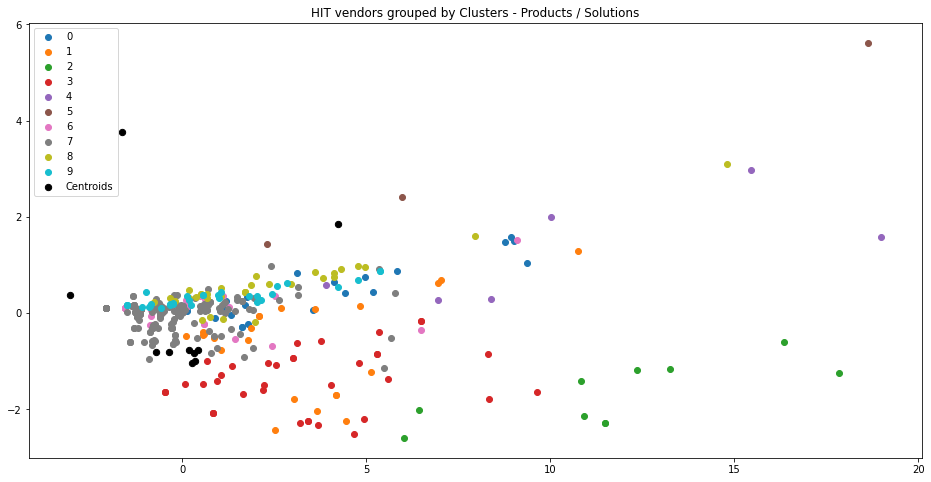

In [12]:
from sklearn.decomposition import PCA

centroids = km.cluster_centers_

pca = PCA(2)
 
# Transform the data
df = pca.fit_transform(dist_to_cluster)
df_cent = pca.fit_transform(centroids)

# Get unique labels
u_labels = np.unique(cluster_membership)

plt.figure(figsize=(16,8))

#plotting the results:
for i in u_labels:
    plt.scatter(df[cluster_membership == i, 0], df[cluster_membership == i, 1] , label = i)
    # Use below to eliminate any outlier clusters
    #if i not in [1, 8]:
    #    plt.scatter(df[cluster_membership == i, 0], df[cluster_membership == i, 1] , label = i)

plt.scatter(df_cent[:,0], df_cent[:,1], s = 40, color = 'k', label = 'Centroids')
plt.legend()
plt.title('HIT vendors grouped by Clusters - Products / Solutions')
plt.show()

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(dtm)
cos_distance = 1 - similarity

df_cos_distance = pd.DataFrame(cos_distance, columns = company_name, index = company_name)
df_cos_distance

,MEDHOST,nThrive,TrialStat Solutions Inc.,Curve Dental,VetSuccess,Medical Billing,PROTEUS 420,Cirius Group Inc.,Surge,CentralReach,...,Episode Alert,McKesson,ScienceSoft,SYFT,StoriiCare,"Chetu, Inc.",TractManager,Claimocity,Bridge Connector,Bamboo Agile
MEDHOST,2.220446e-16,0.39447,1.0,8.509288e-01,1.0,1.0,1.0,1.0,1.0,1.000000,...,1.0,0.478251,0.817426,1.000000,1.0,9.016261e-01,1.000000,7.418011e-01,1.0,1.0
nThrive,3.944699e-01,0.00000,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,1.000000,...,1.0,0.753817,1.000000,1.000000,1.0,1.000000e+00,1.000000,1.000000e+00,1.0,1.0
TrialStat Solutions Inc.,1.000000e+00,1.00000,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,1.000000,...,1.0,1.000000,1.000000,1.000000,1.0,1.000000e+00,1.000000,1.000000e+00,1.0,1.0
Curve Dental,8.509288e-01,1.00000,1.0,-2.220446e-16,1.0,1.0,1.0,1.0,1.0,0.591752,...,1.0,0.666667,0.591752,0.919936,1.0,4.134115e-01,0.591752,7.113249e-01,1.0,1.0
VetSuccess,1.000000e+00,1.00000,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,1.000000,...,1.0,1.000000,1.000000,1.000000,1.0,1.000000e+00,1.000000,1.000000e+00,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Chetu, Inc.",9.016261e-01,1.00000,1.0,4.134115e-01,1.0,1.0,1.0,1.0,1.0,0.640789,...,1.0,0.560059,0.784474,0.823883,1.0,-2.220446e-16,1.000000,7.459997e-01,1.0,1.0
TractManager,1.000000e+00,1.00000,1.0,5.917517e-01,1.0,1.0,1.0,1.0,1.0,1.000000,...,1.0,1.000000,1.000000,0.803884,1.0,1.000000e+00,0.000000,1.000000e+00,1.0,1.0
Claimocity,7.418011e-01,1.00000,1.0,7.113249e-01,1.0,1.0,1.0,1.0,1.0,0.292893,...,1.0,0.422650,1.000000,1.000000,1.0,7.459997e-01,1.000000,2.220446e-16,1.0,1.0
Bridge Connector,1.000000e+00,1.00000,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,1.000000,...,1.0,1.000000,1.000000,1.000000,1.0,1.000000e+00,1.000000,1.000000e+00,1.0,1.0


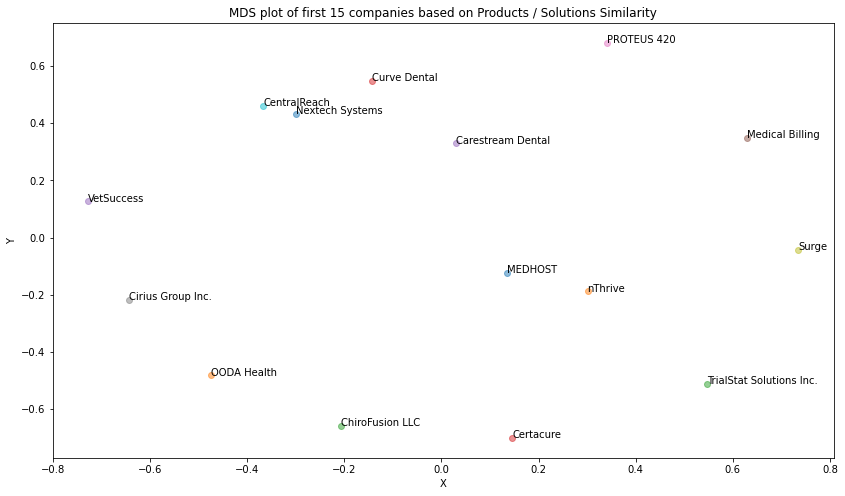

In [14]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

mds = MDS(n_components = 2, dissimilarity = 'precomputed', random_state = 1)

# Use below to plot all companies
#pos = mds.fit_transform(cos_distance)

# Use below to plot first 15 companies
pos = mds.fit_transform(cos_distance[:15, :15])
xs, ys = pos[:, 0], pos[:, 1]

plt.figure(figsize=(14,8))

# Use below to plot all points (names not on plot)
#for x, y in zip(xs, ys):
    #plt.scatter(x, y, alpha=0.5)
    #plt.text(x, y)

# Use below to plot first 15 companies
for x, y, name in zip(xs, ys, company_name[:15]):
    plt.scatter(x, y, alpha=0.5)
    plt.text(x, y, name)
    
plt.title('MDS plot of first 15 companies based on Products / Solutions Similarity')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

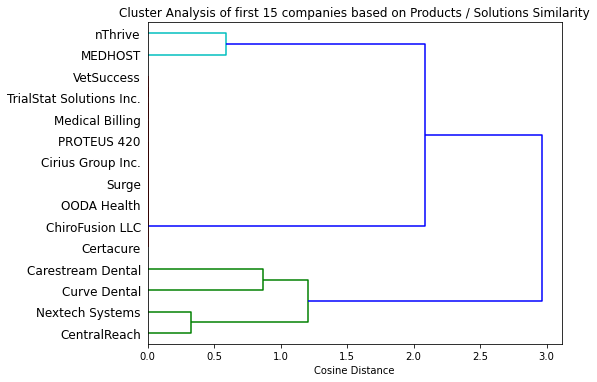

In [15]:
# Hierarchical Clustering using ngram_range = (2,8) & min_df = 20 -> doesn't include Unigrams

from scipy.cluster.hierarchy import ward, dendrogram

#plt.figure(figsize=(12,50))

# Use below to plot all companies
#linkage_matrix = ward(cos_distance)
#dendrogram(linkage_matrix, orientation = 'right', labels = company_name)

plt.figure(figsize=(8,5))

# Use below to plot first 15 companies
linkage_matrix = ward(cos_distance[:15, :15])
dendrogram(linkage_matrix, orientation = 'right', labels = company_name[:15])

plt.tight_layout()
plt.title('Cluster Analysis of first 15 companies based on Products / Solutions Similarity')
plt.xlabel('Cosine Distance')
plt.show()

# As the cosine distance is 1 for several companies -> due to ngram_range = (2,8) and 

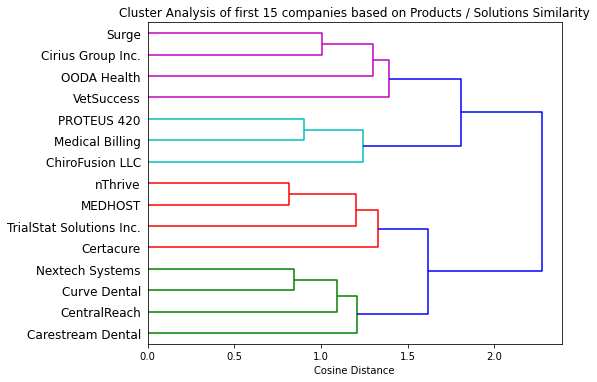

In [32]:
# Generate Term Matrix to include Unigrams as well (ngram_range = (1,8)) and try Hierarchical Clustering

vectorizer1 = CountVectorizer(stop_words = 'english', min_df = 20, ngram_range = (1,8))

dtm1 = vectorizer1.fit_transform(corpus)
terms1 = vectorizer1.get_feature_names()
word_freq1 = dtm1.toarray().sum(axis=0)

df_dtm1 = pd.DataFrame(dtm1.toarray(), columns = terms1, index = company_name)

# Determine Cosine distance
similarity1 = cosine_similarity(dtm1)
cos_distance1 = 1 - similarity1

df_cos_distance1 = pd.DataFrame(cos_distance1, columns = company_name, index = company_name)

plt.figure(figsize=(8,5))

# Hierarchical Clustering
linkage_matrix1 = ward(cos_distance1[:15, :15])
dendrogram(linkage_matrix1, orientation = 'right', labels = company_name[:15])

plt.tight_layout()
plt.title('Cluster Analysis of first 15 companies based on Products / Solutions Similarity')
plt.xlabel('Cosine Distance')
plt.show()

In [17]:
df_model_inp = df_dtm
df_model_inp['Target'] = cluster_membership

df_model_inp.to_csv(model_inp_file, index = True)

# Let us view the Target label distribution
df_model_inp['Target'].value_counts(sort = False)

0     25
1     23
2     10
3     38
4      6
5      3
6     25
7    501
8     34
9     32
Name: Target, dtype: int64

In [18]:
# Let us drop Target class 4 and 5 as # of records are very low

df_model_inp = df_model_inp[(df_model_inp['Target'] != 4) & (df_model_inp['Target'] != 5)]
df_model_inp['Target'].value_counts(sort = False)

0     25
1     23
2     10
3     38
6     25
7    501
8     34
9     32
Name: Target, dtype: int64

In [19]:
#from keras.utils import to_categorical

x_data = df_model_inp.drop('Target', axis=1)
y_data = df_model_inp['Target']
#y_data = to_categorical(df_model_inp['Target'])

print('x_data shape                 :', x_data.shape)
print('y_data shape & target counts : {} {}'.format(y_data.shape, np.unique(y_data, return_counts = True)))

x_data shape                 : (688, 51)
y_data shape & target counts : (688,) (array([0, 1, 2, 3, 6, 7, 8, 9]), array([ 25,  23,  10,  38,  25, 501,  34,  32], dtype=int64))


In [20]:
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = \
                    train_test_split(x_data, y_data, test_size = 0.20, stratify = y_data, random_state = 32)

x_train, x_val, y_train, y_val = \
                    train_test_split(x_train_val, y_train_val, test_size = 0.10, stratify = y_train_val, random_state = 32)

print('x_train_val shape                 :', x_train_val.shape)
print('x_train shape                     :', x_train.shape)
print('x_val shape                       :', x_val.shape)
print('x_test shape                      :', x_test.shape)
print('y_train_val shape & target counts : {} {}'.format(y_train_val.shape, np.unique(y_train_val, return_counts = True)))
print('y_train shape & target counts     : {} {}'.format(y_train.shape, np.unique(y_train, return_counts = True)))
print('y_val shape & target counts       : {} {}'.format(y_val.shape, np.unique(y_val, return_counts = True)))
print('y_test shape & target counts      : {} {}\n'.format(y_test.shape, np.unique(y_test, return_counts = True)))

x_train_val shape                 : (550, 51)
x_train shape                     : (495, 51)
x_val shape                       : (55, 51)
x_test shape                      : (138, 51)
y_train_val shape & target counts : (550,) (array([0, 1, 2, 3, 6, 7, 8, 9]), array([ 20,  18,   8,  30,  20, 401,  27,  26], dtype=int64))
y_train shape & target counts     : (495,) (array([0, 1, 2, 3, 6, 7, 8, 9]), array([ 18,  16,   7,  27,  18, 361,  24,  24], dtype=int64))
y_val shape & target counts       : (55,) (array([0, 1, 2, 3, 6, 7, 8, 9]), array([ 2,  2,  1,  3,  2, 40,  3,  2], dtype=int64))
y_test shape & target counts      : (138,) (array([0, 1, 2, 3, 6, 7, 8, 9]), array([  5,   5,   2,   8,   5, 100,   7,   6], dtype=int64))



In [21]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

# Below function will define the simple Neural Network that accepts necessary parameters that can be configured: 
# Note: although only 8 target variables are present, output nodes are mentioned as 10 since largest label value is 9

def train_model(x_train, y_train, x_val, y_val, num_hidden_units_1, num_hidden_units_2, epochs, batch_size, learning_rate):
    model_snn = models.Sequential()
    model_snn.add(layers.Dense(num_hidden_units_1, activation = 'relu', input_shape = ((x_train.shape[1],)),
                           kernel_regularizer = regularizers.l1_l2(l1 = 0.0001, l2 = 0.0001)))
    model_snn.add(layers.Dropout(0.3))
    model_snn.add(layers.Dense(num_hidden_units_2, activation = 'relu', 
                           kernel_regularizer = regularizers.l1_l2(l1 = 0.0001, l2 = 0.0001)))
    model_snn.add(layers.Dropout(0.3))
    model_snn.add(layers.Dense(10, activation = 'softmax'))   
    model_snn.summary()
    
    model_snn.compile(loss = 'sparse_categorical_crossentropy', 
                  optimizer = optimizers.RMSprop(lr = learning_rate), 
                  metrics = ['accuracy'])
    
    history_snn = model_snn.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                                validation_data = (x_val, y_val))
    return (history_snn, model_snn)

In [22]:
def plot_learning(history): 
    # Plot the Loss curve 
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'bo', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()   # clear figure

    # Plot the Accuracy curve 
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'bo', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

target_dict = {'0': 0,
               '1': 1,
               '2': 2,
               '3': 3,
               #'4': 4,
               #'5': 5,
               '6': 6,
               '7': 7,
               '8': 8,
               '9': 9}

def print_metrics(model, x_test, y_test, target_dict): 
    #y_test_pred = model.predict_classes(x_test)
    y_test_pred = np.argmax(model.predict(x_test), axis=-1)
    print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_test_pred))
    print('\nClassification Report:\n ', classification_report(y_test, y_test_pred, target_names = target_dict))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3328      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 5,738
Trainable params: 5,738
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 54ms/step - loss: 2.2991 - accuracy: 0.4687 - val_loss: 2.2449 - va

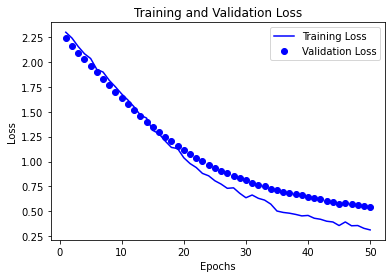

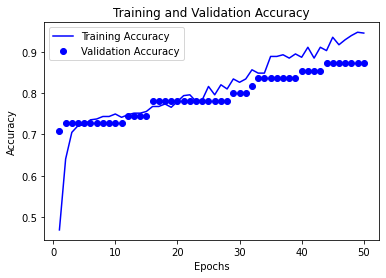

Training Loss & Accuracy: 
16/16 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9818

Validation Loss & Accuracy: 
2/2 [==============================] - 0s 0s/step - loss: 0.5457 - accuracy: 0.8727

Test Loss & Accuracy: 
5/5 [==============================] - 0s 1ms/step - loss: 0.4437 - accuracy: 0.8986

Confusion Matrix:
 [[ 1  0  0  0  0  4  0  0]
 [ 0  3  0  1  0  1  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  7  0  1  0  0]
 [ 0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0 99  1  0]
 [ 0  0  0  0  0  2  5  0]
 [ 0  0  0  0  0  2  0  4]]

Classification Report:
                precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         2
           3       0.70      0.88      0.78         8
           6       1.00      1.00      1.00         5
           7       0.91      0.99      0.95       100
           8       0.

In [24]:
# Tune the hyper parameters -> hidden units in both layers, epochs, batch size, learning rate
# For updating the L1, L2 regulalizer or drop out values, update in the function where the model is defined

history_snn, model_snn = train_model(x_train, y_train, x_val, y_val, num_hidden_units_1 = 64, num_hidden_units_2 = 32, 
                                     epochs = 50, batch_size = 128, learning_rate = 0.001)

plot_learning(history_snn)

print('Training Loss & Accuracy: ') 
model_snn.evaluate(x_train, y_train)

print('\nValidation Loss & Accuracy: ')
model_snn.evaluate(x_val, y_val)

# Evalaute the model on Test data for generalization 
print('\nTest Loss & Accuracy: ')
model_snn.evaluate(x_test, y_test)

print_metrics(model_snn, x_test, y_test, target_dict)

In [25]:
def build_ml_model(x_train, y_train, x_test, y_test, target_dict, model):
    model.fit(x_train, y_train)
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)

    print('Train Accuracy : %.4f' % train_acc)
    print('Test Accuracy  : %.4f' % test_acc)

    y_test_pred = model.predict(x_test)

    print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_test_pred))
    print('\nClassification Report:\n ', classification_report(y_test, y_test_pred, target_names = target_dict))
    
    return (model)

In [26]:
from sklearn.linear_model import LogisticRegressionCV

model_lr = LogisticRegressionCV(cv = 5, max_iter = 1000, random_state = 32, n_jobs = -1,
                                #Cs = np.logspace(-10, 1, 10))
                                Cs = [1])
model_lr = build_ml_model(x_train_val, y_train_val, x_test, y_test, target_dict, model_lr)

Train Accuracy : 1.0000
Test Accuracy  : 0.9710

Confusion Matrix:
 [[  3   0   0   0   0   2   0   0]
 [  0   4   0   1   0   0   0   0]
 [  0   0   1   1   0   0   0   0]
 [  0   0   0   8   0   0   0   0]
 [  0   0   0   0   5   0   0   0]
 [  0   0   0   0   0 100   0   0]
 [  0   0   0   0   0   0   7   0]
 [  0   0   0   0   0   0   0   6]]

Classification Report:
                precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      0.80      0.89         5
           2       1.00      0.50      0.67         2
           3       0.80      1.00      0.89         8
           6       1.00      1.00      1.00         5
           7       0.98      1.00      0.99       100
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         6

    accuracy                           0.97       138
   macro avg       0.97      0.86      0.90       138
weighted avg       0.97      

In [27]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB(alpha = 1)
model_nb = build_ml_model(x_train_val, y_train_val, x_test, y_test, target_dict, model_nb)

Train Accuracy : 0.9745
Test Accuracy  : 0.9348

Confusion Matrix:
 [[ 2  0  0  0  0  3  0  0]
 [ 0  3  2  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0]
 [ 0  0  0  7  0  1  0  0]
 [ 0  0  0  0  5  0  0  0]
 [ 0  0  0  1  0 97  1  1]
 [ 0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  6]]

Classification Report:
                precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       1.00      0.60      0.75         5
           2       0.50      1.00      0.67         2
           3       0.88      0.88      0.88         8
           6       1.00      1.00      1.00         5
           7       0.96      0.97      0.97       100
           8       0.88      1.00      0.93         7
           9       0.86      1.00      0.92         6

    accuracy                           0.93       138
   macro avg       0.88      0.86      0.84       138
weighted avg       0.94      0.93      0.93       138



In [28]:
from sklearn.svm import LinearSVC

model_lsvc = LinearSVC(max_iter = 10000, C = 1000)
model_lsvc = build_ml_model(x_train_val, y_train_val, x_test, y_test, target_dict, model_lsvc)

Train Accuracy : 0.9927
Test Accuracy  : 0.9638

Confusion Matrix:
 [[  4   0   0   0   0   1   0   0]
 [  0   4   0   1   0   0   0   0]
 [  0   0   1   1   0   0   0   0]
 [  0   0   0   7   0   0   1   0]
 [  0   0   0   0   5   0   0   0]
 [  0   0   0   0   0 100   0   0]
 [  0   0   0   0   0   1   6   0]
 [  0   0   0   0   0   0   0   6]]

Classification Report:
                precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      0.80      0.89         5
           2       1.00      0.50      0.67         2
           3       0.78      0.88      0.82         8
           6       1.00      1.00      1.00         5
           7       0.98      1.00      0.99       100
           8       0.86      0.86      0.86         7
           9       1.00      1.00      1.00         6

    accuracy                           0.96       138
   macro avg       0.95      0.85      0.89       138
weighted avg       0.97      

In [29]:
from sklearn.ensemble import RandomForestClassifier

maximum_features = 51

model_rf = RandomForestClassifier(n_jobs = -1, random_state = 32, oob_score = 'True', criterion = 'gini', 
                                  #n_estimators = 150, max_depth = 5)
                                  n_estimators = 500, max_depth = 10, max_features = maximum_features)
                                  
model_rf = build_ml_model(x_train_val, y_train_val, x_test, y_test, target_dict, model_rf)

Train Accuracy : 0.9945
Test Accuracy  : 0.9710

Confusion Matrix:
 [[  3   0   0   0   0   2   0   0]
 [  0   4   0   1   0   0   0   0]
 [  0   0   2   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0]
 [  0   0   0   0   5   0   0   0]
 [  0   0   0   0   0 100   0   0]
 [  0   0   0   0   1   0   6   0]
 [  0   0   0   0   0   0   0   6]]

Classification Report:
                precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         2
           3       0.89      1.00      0.94         8
           6       0.83      1.00      0.91         5
           7       0.98      1.00      0.99       100
           8       1.00      0.86      0.92         7
           9       1.00      1.00      1.00         6

    accuracy                           0.97       138
   macro avg       0.96      0.91      0.93       138
weighted avg       0.97      

In [30]:
from xgboost import XGBClassifier

model_xgbc = XGBClassifier(n_jobs = -1, random_state = 32, verbosity = 0, 
                           n_estimators = 75, max_depth = 4, learning_rate = 0.1)
                                  
model_xgbc = build_ml_model(x_train_val, y_train_val, x_test, y_test, target_dict, model_xgbc)

Train Accuracy : 0.9982
Test Accuracy  : 0.9710

Confusion Matrix:
 [[  3   0   0   0   0   2   0   0]
 [  0   4   0   1   0   0   0   0]
 [  0   0   2   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0]
 [  0   0   0   0   5   0   0   0]
 [  0   0   0   0   0 100   0   0]
 [  0   0   0   0   1   0   6   0]
 [  0   0   0   0   0   0   0   6]]

Classification Report:
                precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         2
           3       0.89      1.00      0.94         8
           6       0.83      1.00      0.91         5
           7       0.98      1.00      0.99       100
           8       1.00      0.86      0.92         7
           9       1.00      1.00      1.00         6

    accuracy                           0.97       138
   macro avg       0.96      0.91      0.93       138
weighted avg       0.97      

In [31]:
models_dict = {'Logistic Regression': model_lr, 
               'Multinomial NB': model_nb, 
               'Linear SVC': model_lsvc, 
               'Random Forest Classifier': model_rf, 
               'XGBoost Classifier': model_xgbc,
               'Simple NN': model_snn}

def model_perf(x, y, model): 
    if model_name == 'Simple NN':
        loss, accuracy = model.evaluate(x, y)
    else:
        accuracy = model.score(x, y)
    return (accuracy)

results = []
  
for model_name, model in models_dict.items():
    accuracy_train = model_perf(x_train, y_train, model)
    accuracy_val = model_perf(x_val, y_val, model)
    accuracy_test = model_perf(x_test, y_test, model) 
    results.append([model_name, accuracy_train, accuracy_val, accuracy_test])

column = ['Model name', 'Training Acc', 'Val Acc', 'Test Acc']

df_results = pd.DataFrame(results, columns = column)
df_results.sort_values(by = ['Test Acc'], ascending = False, inplace = True)
df_results.reset_index(drop = True, inplace = True)
df_results.round(4)

5/5 [==============================] - 0s 1ms/step - loss: 0.4437 - accuracy: 0.8986


,Model name,Training Acc,Val Acc,Test Acc
0,Logistic Regression,1.0000,1.0000,0.9710
1,Random Forest Classifier,0.9960,0.9818,0.9710
2,XGBoost Classifier,0.9980,1.0000,0.9710
3,Linear SVC,0.9919,1.0000,0.9638
4,Multinomial NB,0.9758,0.9636,0.9348
5,Simple NN,0.9818,0.8727,0.8986
